## Project Proposal: Grouping Galaxies by Spatial Coordinates

### Objective
Use publicly available data on several thousand galaxies to create a map of our cosmic neighborhood

### Methods and Models
- Collect data from the [NASA/IPAC Extragalactic Database (NED)](https://ned.ipac.caltech.edu/): for each galaxy in the New General Catalogue, collect declination and right ascension (angular coordinates, analogous to latitude and longitude) and redshift (can be used to estimate distance from Earth)
- Use DBSCAN to group the data points (galaxies) into clusters
- Easy problem: compare these clusters to real maps of galaxy distributions and evaluate the usefulness of unsupervised learning methods for learning about these and similar data
- Hard problem: make predictions on the future evolution of these clusters (will they collapse? disband?); this is probably impossible given computational constraints, but maybe predictions could be made using momentum or similar calculations

### Risks/Assumptions Associated with the Data
The New General Catalogue consists of 7841 astronomical objects, but not all of them are galaxies. In addition, the catalogue is more comprehensive for the northern sky than the southern sky, meaning that most of the galaxies in the catalogue are above 0<sup>°</sup>. Finally, some of the entries in the NED are missing redshift values. I believe that there will still be enough galaxies to create a useful model.

### Goals/Success Criteria
- Goal: use machine learning to create a representation of the distribution of galaxies that is both accurate and visually/intellectually appealing (interactive map?)
- Success metrics: silhouette score, comparison to real galactic clusters that are known to be gravitationally interacting

### Preliminary EDA

In [11]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
galaxies = pd.read_csv("partial.csv")

In [3]:
galaxies.describe()

,ra,dec,z,+/-
count,6370.000000,6370.000000,6328.000000,6.293000e+03
mean,155.658645,11.945210,0.015722,5.995003e-05
std,74.735049,31.544619,0.010455,6.182737e-05
min,1.816000,-89.334528,-0.001001,1.000000e-06
25%,104.666164,-9.522851,0.007275,1.700000e-05
50%,183.679356,12.276527,0.014464,3.700000e-05
75%,206.900719,34.716464,0.022242,9.000000e-05
max,296.350917,89.093042,0.115660,1.490000e-03


#### column names:
- ra: right acension (degrees)
- dec: declination (degrees)
- z: redshift: (λ<sub>obs</sub> - λ<sub>emit</sub>) / λ<sub>emit</sub>; larger = farther away
- +/-: uncertainty in z

In [10]:
galaxies.isna().mean()

name    0.000000
ra      0.000000
dec     0.000000
z       0.006593
+/-     0.012088
dtype: float64

#### not many nulls, so we can (probably) drop them

In [5]:
galaxies.dtypes

name     object
ra      float64
dec     float64
z       float64
+/-     float64
dtype: object

In [12]:
galaxies["dec"].max(), galaxies["dec"].min() # declination of the northernmost and the southernmost galaxy in the dataset

(89.09304236, -89.33452778)

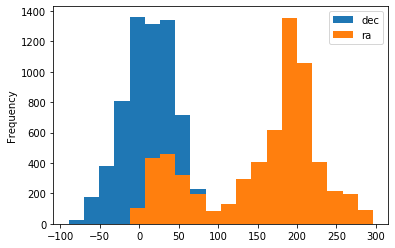

In [24]:
galaxies[["dec", "ra"]].plot(kind="hist", bins=20); # distribution of both coordinates

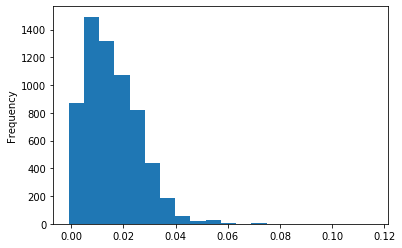

In [23]:
galaxies["z"].plot(kind="hist", bins=20); # distribution of redshift values

#### This EDA was performed using a partial dataset that is about 85% the size of the full set.